<a href="https://colab.research.google.com/github/Juan08diego/TAREASMODULOS/blob/master/TareaMod11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***SOLUCIÓN ACTIVIDAD MODULO 11***:

***Nombre:*** Juan Diego Vargas Mesa

***CC*** 1013099612



In [2]:
#PRIMERO INSTALAMOS SODAPY

!pip install sodapy

In [3]:
#Importamos las librerias que vamos a necesitar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata

**PUNTO 1:** KVECINOS


In [4]:
# https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/CATASTRO-DE-ARBOLES-DEL-MUNICIPIO-DE-GUATAVITA/r4k4-8sux
# Buscar un dataset que sirva para manejar los parametros que necesitamos conlleva arto tiempo
# Sin embargo logré encontrar este que considero puede servir

client= Socrata('www.datos.gov.co', None)

result= client.get('r4k4-8sux')
dfarbol= pd.DataFrame.from_records(result)

dfarbol.head()

,nombre_com_n,nombre_cient_fico,familia,altura_m,cap_cm,dap_cm,ubicaci_n,sector,latitud,longitud
0,Roble,Quercus humboldtii,FAGACEAE,"2,5 m",11 cm,"3,50 cm",Casco Urbano,Balcones de la sierra,"04° 56' 15.1""","73° 50' 22.6"""
1,Roble,Quercus humboldtii,FAGACEAE,2 m,10 cm,"3,18 cm",Casco Urbano,Balcones de la sierra,"04° 56' 15.3""","73° 50' 22.6"""
2,Roble,Quercus humboldtii,FAGACEAE,3 m,18 cm,"5,73 cm",Casco Urbano,Balcones de la sierra,"04° 56' 15.5""","73° 50' 22.6"""
3,Roble,Quercus humboldtii,FAGACEAE,"2,5 m",13 cm,"4,14 cm",Casco Urbano,Balcones de la sierra,"04° 56' 15.7""","73° 50' 22.6"""
4,Roble,Quercus humboldtii,FAGACEAE,2 m,"6,5 cm","2,07 cm",Casco Urbano,Balcones de la sierra,"04° 56' 15.8""","73° 50' 22.7"""


In [5]:
# Para las tareas de limpieza eliminaremos algunas columnas, veremos si hay datos nulos y pasaremos los datos a un tipo de dato que pueda ser tratado
dfarbol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nombre_com_n       755 non-null    object
 1   nombre_cient_fico  755 non-null    object
 2   familia            755 non-null    object
 3   altura_m           755 non-null    object
 4   cap_cm             755 non-null    object
 5   dap_cm             755 non-null    object
 6   ubicaci_n          755 non-null    object
 7   sector             755 non-null    object
 8   latitud            755 non-null    object
 9   longitud           755 non-null    object
dtypes: object(10)
memory usage: 59.1+ KB


In [6]:
# Observamos que no contamos con datos nulos sin embargo eliminaremos unas columnas que no considero relevantes para el ejercicio
del(dfarbol['nombre_cient_fico'])
del(dfarbol['sector'])
del(dfarbol['latitud'])
del(dfarbol['longitud'])
del(dfarbol['ubicaci_n'])
del(dfarbol['nombre_com_n'])

In [7]:
dfarbol

,familia,altura_m,cap_cm,dap_cm
0,FAGACEAE,"2,5 m",11 cm,"3,50 cm"
1,FAGACEAE,2 m,10 cm,"3,18 cm"
2,FAGACEAE,3 m,18 cm,"5,73 cm"
3,FAGACEAE,"2,5 m",13 cm,"4,14 cm"
4,FAGACEAE,2 m,"6,5 cm","2,07 cm"
...,...,...,...,...
750,ARECACEAE,2 m,59 cm,"18,78 cm"
751,ARECACEAE,2 m,56 cm,"17,83 cm"
752,ARECACEAE,2 m,55 cm,"17,51 cm"
753,ARECACEAE,"2,3 m",53 cm,"16,87 cm"


In [8]:
# Remplazamos algunos terminos como 'cm' que nos impedirán hacer el cambio a floats
# Ademas remplazaremos unas palabras por 0 para porder borrar esas filas luego

dfarbol['altura_m'] = dfarbol['altura_m'].str.replace(',', '.')
dfarbol['altura_m'] = dfarbol['altura_m'].str.replace('m', '')
dfarbol['cap_cm'] = dfarbol['cap_cm'].str.replace(',', '.')
dfarbol['dap_cm'] = dfarbol['dap_cm'].str.replace(',', '.')
dfarbol['cap_cm'] = dfarbol['cap_cm'].str.replace('cm', '')
dfarbol['cap_cm'] = dfarbol['cap_cm'].str.replace('-', '0')
dfarbol['dap_cm'] = dfarbol['dap_cm'].str.replace('-', '0')
dfarbol['cap_cm'] = dfarbol['cap_cm'].str.replace('Indeterminado', '0')
dfarbol['dap_cm'] = dfarbol['dap_cm'].str.replace('Indeterminado', '0')

dfarbol['dap_cm'] = dfarbol['dap_cm'].str.replace('cm', '')

dfarbol

,familia,altura_m,cap_cm,dap_cm
0,FAGACEAE,2.5,11,3.50
1,FAGACEAE,2,10,3.18
2,FAGACEAE,3,18,5.73
3,FAGACEAE,2.5,13,4.14
4,FAGACEAE,2,6.5,2.07
...,...,...,...,...
750,ARECACEAE,2,59,18.78
751,ARECACEAE,2,56,17.83
752,ARECACEAE,2,55,17.51
753,ARECACEAE,2.3,53,16.87


In [9]:
# Ahora pasamos los datos a floats de numpy para poder trabajarlos
dfarbol['altura_m']=(dfarbol['altura_m'].astype(float))
dfarbol['cap_cm']=(dfarbol['cap_cm'].astype(float))
dfarbol['dap_cm']=(dfarbol['dap_cm'].astype(float))

dfarbol.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   familia   755 non-null    object 
 1   altura_m  755 non-null    float64
 2   cap_cm    755 non-null    float64
 3   dap_cm    755 non-null    float64
dtypes: float64(3), object(1)
memory usage: 23.7+ KB


In [10]:
#Como dinicamos arriba eliminaremos las filas donde esten los valores 0 ya que no podemos inventarnos valores

dfarbol = dfarbol.drop(dfarbol.loc[dfarbol['cap_cm'] == 0].index)

In [11]:
# Aqui verificamos si hay algun valor en ceros que anteriormente eran 3
con=0
for f in range(len(dfarbol)):
  if dfarbol['cap_cm'].iloc[f] == 0:
    print(f)

In [12]:
#verificamos que se hayan borrado las 3 filas quedandonos 752 del las 755
dfarbol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 754
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   familia   752 non-null    object 
 1   altura_m  752 non-null    float64
 2   cap_cm    752 non-null    float64
 3   dap_cm    752 non-null    float64
dtypes: float64(3), object(1)
memory usage: 29.4+ KB


In [13]:
dfarbol.head(2)

,familia,altura_m,cap_cm,dap_cm
0,FAGACEAE,2.5,11.0,3.50
1,FAGACEAE,2.0,10.0,3.18


In [14]:
# Aqui le damos un codigo a cada familia de arbol para asi tener las etiquetas
# Usamos la función factorize que me recomendó chat gpt para asignarle un codigo a cada familia de 0  a 43 dandonos asi 44 familias
dfarbol['familia_cod'] = pd.factorize(dfarbol['familia'])[0]

for k in dfarbol['familia_cod']:
  print(k)

0
0
0
0
0
0
1
2
3
4
5
0
6
0
5
0
0
0
0
0
0
0
7
0
0
8
9
10
10
2
2
11
12
13
14
15
16
5
8
17
1
4
18
2
4
0
0
0
0
0
0
0
0
0
0
0
0
4
4
4
0
11
17
4
2
5
5
19
5
20
4
8
20
15
15
15
0
15
15
15
21
15
10
5
5
1
5
5
15
4
13
4
20
4
11
19
1
13
5
22
23
23
23
20
10
10
10
10
10
10
10
24
22
25
10
26
22
10
5
5
10
8
8
27
8
8
28
27
16
8
12
24
16
16
16
1
16
16
0
28
29
16
17
16
16
15
13
20
30
30
30
30
20
15
15
20
29
8
15
4
1
1
1
1
1
31
9
13
13
5
5
5
5
20
20
32
32
5
8
5
5
5
5
11
5
5
5
5
5
5
5
5
20
20
20
20
20
20
22
22
22
32
22
11
11
9
9
9
24
20
9
30
9
5
9
30
16
30
20
5
5
5
10
16
30
9
16
16
27
4
4
24
24
2
30
15
22
22
33
15
12
24
30
24
30
2
20
24
2
15
20
20
33
20
20
20
20
20
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
5
5
5
2
4
4
4
4
5
5
0
0
5
5
5
5
0
0
2
28
28
28
28
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
18
22
8
5
4
20
5
5
5
5
5
5
2
2
5
20
27
2
2
10
10
4
20
2
5
5
5
5
5
4
5
2
20
2
2
1
34
1
1
1
4
6
1
6
1
1
6
16
6
2
6
16
6
1
6
6
6
6
30
1
2
30
2
1
35
2
2
2
1
1
2
16
16
1
16
16
6
16
12
20
20
20
20
2
5
5
16
5
5
14
16
5
29

In [15]:
# Para verificar que estan en orden y no se saltaron números
noma = []
for i in dfarbol['familia_cod']:
  if i not in noma:
    noma.append(i)
print(noma)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


In [16]:
# Ademas borramos la columna de familia
del(dfarbol['familia'])
dfarbol


,altura_m,cap_cm,dap_cm,familia_cod
0,2.5,11.0,3.50,0
1,2.0,10.0,3.18,0
2,3.0,18.0,5.73,0
3,2.5,13.0,4.14,0
4,2.0,6.5,2.07,0
...,...,...,...,...
750,2.0,59.0,18.78,20
751,2.0,56.0,17.83,20
752,2.0,55.0,17.51,20
753,2.3,53.0,16.87,20


In [17]:
# Ahora creamos los arreglos para que se puedan trabajar
x1=np.array(dfarbol['altura_m'])
x2=np.array(dfarbol['cap_cm'])
x3=np.array(dfarbol['dap_cm'])




In [18]:
#Creamos la matriz para los datos de entrada
into=[]
for i in range(len(dfarbol['altura_m'])):
    aux=[]
    aux.append(x1[i])
    aux.append(x2[i])
    aux.append(x3[i])
    into.append(aux)
X=np.array(into)
X

array([[ 2.5 , 11.  ,  3.5 ],
       [ 2.  , 10.  ,  3.18],
       [ 3.  , 18.  ,  5.73],
       ...,
       [ 2.  , 55.  , 17.51],
       [ 2.3 , 53.  , 16.87],
       [ 2.5 , 51.  , 16.23]])

In [19]:
#Y tambien creamos los datos de salida
Y=np.array(dfarbol['familia_cod'])
print(type(Y))
Y

<class 'numpy.ndarray'>


array([ 0,  0,  0,  0,  0,  0,  1,  2,  3,  4,  5,  0,  6,  0,  5,  0,  0,
        0,  0,  0,  0,  0,  7,  0,  0,  8,  9, 10, 10,  2,  2, 11, 12, 13,
       14, 15, 16,  5,  8, 17,  1,  4, 18,  2,  4,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  4,  4,  4,  0, 11, 17,  4,  2,  5,  5, 19,
        5, 20,  4,  8, 20, 15, 15, 15,  0, 15, 15, 15, 21, 15, 10,  5,  5,
        1,  5,  5, 15,  4, 13,  4, 20,  4, 11, 19,  1, 13,  5, 22, 23, 23,
       23, 20, 10, 10, 10, 10, 10, 10, 10, 24, 22, 25, 10, 26, 22, 10,  5,
        5, 10,  8,  8, 27,  8,  8, 28, 27, 16,  8, 12, 24, 16, 16, 16,  1,
       16, 16,  0, 28, 29, 16, 17, 16, 16, 15, 13, 20, 30, 30, 30, 30, 20,
       15, 15, 20, 29,  8, 15,  4,  1,  1,  1,  1,  1, 31,  9, 13, 13,  5,
        5,  5,  5, 20, 20, 32, 32,  5,  8,  5,  5,  5,  5, 11,  5,  5,  5,
        5,  5,  5,  5,  5, 20, 20, 20, 20, 20, 20, 22, 22, 22, 32, 22, 11,
       11,  9,  9,  9, 24, 20,  9, 30,  9,  5,  9, 30, 16, 30, 20,  5,  5,
        5, 10, 16, 30,  9

In [20]:
#Armamos el modelo de clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.15)

In [21]:
#Los datos de prueba
print(X_test)
print('--------------------------')
print(y_test)

[[  1.5   23.     7.32]
 [  1.    13.     4.14]
 [  3.    45.    14.32]
 [  0.6    7.     2.23]
 [  1.5   26.     8.28]
 [  3.5   23.     7.32]
 [  2.    20.     6.37]
 [  0.4    3.     0.96]
 [  1.5   62.    19.74]
 [  1.4   23.     7.32]
 [  2.    29.     9.23]
 [  3.5   23.     7.32]
 [  1.3   13.     4.14]
 [  1.     9.     2.87]
 [  2.    28.     8.91]
 [  4.5   21.     6.69]
 [  1.7   45.    14.32]
 [  1.     4.     1.27]
 [  3.5   80.    25.47]
 [  2.5   27.     8.59]
 [  1.6   34.    10.82]
 [  2.5   33.    10.5 ]
 [  2.    14.     4.46]
 [  4.    51.    16.23]
 [  1.     8.     2.55]
 [  1.3   28.     8.91]
 [  1.5   16.     5.09]
 [  1.3   13.     4.14]
 [  3.    44.    14.01]
 [  2.5   18.     5.73]
 [  3.    22.     7.  ]
 [  1.    13.     4.14]
 [  5.    27.     8.59]
 [  1.5   44.    14.01]
 [  3.5  140.    44.56]
 [ 12.    88.    28.01]
 [  5.    42.    13.37]
 [  1.5   11.     3.5 ]
 [  1.5   23.     7.32]
 [  1.     9.     2.87]
 [  1.5   20.     6.37]
 [  2.    12.   

In [22]:
#Los datos de entrenamiento
print(X_train)
print('--------------------------')
print(y_train)

[[ 2.   15.    4.78]
 [ 1.   17.    5.41]
 [ 1.5  16.    5.09]
 ...
 [ 0.8  14.    4.46]
 [ 3.   37.   11.78]
 [ 6.   68.   21.65]]
--------------------------
[ 1  5  5  1 11  5 13  0 27  5  6  6  5  5  1 12 32 20  2  5 12  1  5 16
  5  2  5 20  5 12  4  5 20 40 20 16  4 16  1  5  1  5 30  2 11 11  0 12
  5  5  7  5  2  4  2  5  8  5  1 30  5  5  0 11  2  5  5  1  5  5 28 15
 10  5  0  1 30  1 12  1  5 38  2 15  2  5  2  5 32 15  5 16 32  5  5 30
  5 16  2  6 20  1 27  5  5 15  5 16  5  1  5  5  5  5  2  5  5  5 13  1
  2  1 20 13 20  5 16  5 24  5  5  6  5  4  8 12  5  8  1 20  5  2  0 17
  5  5  5 24  1 10  4 12 42  1  5  5 15 12  5  1 30  2  4 22  5 12  9  8
 23 10 20 11  5  0  6 16 20  5  5 12 16 10  2 20  5  5  1  1 12 30 16  5
  5 10  2  1  6 12 28 36  5 30  9  2  0  4  8 16 28  4 16  5  5 12 14 12
  5 19  5  5 20 22 18  0  5  5  1  4  4  5 24 10 12 22  5  5  0 30  6 38
  5  5  5 14 12 16  2 16  5  5  5  0  5 30  5  5  1 15 12 22  5 17 35  5
 24 10 10 15  5 20  5  5 28  5 20  5 1

In [23]:
#Procedemos a entrenar el modelo con los datos predisppuestos para esto
Knn=KNeighborsClassifier(n_neighbors=44)
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=44)

In [24]:
#Prodemos a predecir a que familia pertenecen los datos de prueba
Knn.predict(X_test)

array([ 5,  5,  5,  5,  5,  5,  5,  5, 20,  5,  5,  5,  5,  5,  5,  5,  5,
        5, 20,  5,  5,  5,  5, 20,  5,  5,  5,  5,  5,  1,  5,  5,  5,  5,
        2, 20,  5,  5,  5,  5,  5,  5,  5,  5,  5, 20, 20, 20,  5, 20,  2,
        5,  2,  5,  5,  0,  5,  2,  5, 20,  5,  5,  5,  5, 20,  5, 20,  5,
        5,  5,  2, 20,  5,  5,  5,  2, 20, 20,  5,  5,  5,  5,  5,  5,  2,
        2,  5,  5,  2, 20,  5,  5, 20,  5,  5,  5,  1,  5,  5, 20,  5,  5,
        5, 20,  5,  5,  5,  5,  5,  2,  5,  2,  1])

In [25]:
# Ahora revisamos la metrica
Knn.score(X_test,y_test)

0.3893805309734513

In [26]:
#aqui prodemos a verificar si habia algún número de vecinos más apropiado para el modelo
# usando un rango de 1 a 45 para asi incluir el valor que nosotros usamos
from sklearn import neighbors
train_scores= {}
test_scores= {}
neighbors= np.arange(1,45)
for neighbor in neighbors:
  Knn= KNeighborsClassifier(n_neighbors=neighbor)
  Knn.fit(X_train, y_train)
  train_scores[neighbor]= Knn.score(X_train, y_train)
  test_scores[neighbor]= Knn.score(X_test, y_test)

In [27]:
#Visualizamos los puntajes con el diferente número de vecinos

print(train_scores)
print(test_scores)

{1: 0.7230046948356808, 2: 0.5555555555555556, 3: 0.49921752738654146, 4: 0.4788732394366197, 5: 0.4694835680751174, 6: 0.4507042253521127, 7: 0.4428794992175274, 8: 0.4194053208137715, 9: 0.4209702660406886, 10: 0.4084507042253521, 11: 0.40688575899843504, 12: 0.40688575899843504, 13: 0.405320813771518, 14: 0.40219092331768386, 15: 0.40375586854460094, 16: 0.38810641627543035, 17: 0.38497652582159625, 18: 0.3865414710485133, 19: 0.38341158059467917, 20: 0.38497652582159625, 21: 0.37871674491392804, 22: 0.37871674491392804, 23: 0.38028169014084506, 24: 0.37089201877934275, 25: 0.36619718309859156, 26: 0.37245696400625977, 27: 0.3755868544600939, 28: 0.37715179968701096, 29: 0.3755868544600939, 30: 0.37402190923317685, 31: 0.37089201877934275, 32: 0.37715179968701096, 33: 0.3677621283255086, 34: 0.3646322378716745, 35: 0.36932707355242567, 36: 0.36619718309859156, 37: 0.36306729264475746, 38: 0.3615023474178404, 39: 0.36306729264475746, 40: 0.36306729264475746, 41: 0.3646322378716745, 4

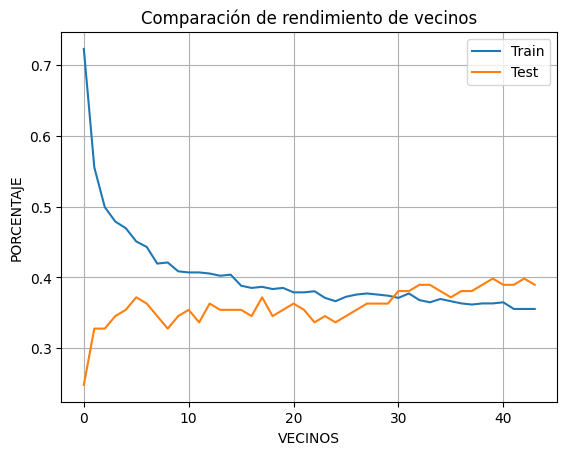

In [28]:
plt.plot(list(train_scores.values()), label='Train')
plt.plot(list(test_scores.values()), label='Test')
plt.legend()
plt.xlabel('VECINOS')
plt.ylabel('PORCENTAJE')
plt.title('Comparación de rendimiento de vecinos')
plt.grid()
plt.show()


**CONCLUSIONES FINALES**

Despues de tener todos los datos del testeo sacados del modelo prodemos concluir que; la clasificación no es buena pues el puntaje que obtubimos fue de 0.3893805309734513 lo cual esta lejos de ser una clasificación decente, y aunque intentamos ver si habia alguna cantidad de vecinos que fuera más apropiada para el modelo, pudimos notar que el puntaje no soprepasaba los 0.5

***La clasificación no es buena***

**PUNTO 2** KMEDIAS

In [29]:
# Importamos el dataset con socrata
# https://www.datos.gov.co/Educaci-n/Saber-11-2019-2/ynam-yc42

client= Socrata('www.datos.gov.co', None)

result= client.get('ynam-yc42')
df2= pd.DataFrame.from_records(result)

df2.head()

,estu_tipodocumento,estu_nacionalidad,estu_genero,estu_fechanacimiento,periodo,estu_consecutivo,estu_estudiante,estu_tieneetnia,estu_pais_reside,estu_etnia,...,punt_ingles,percentil_ingles,desemp_ingles,punt_global,percentil_global,estu_inse_individual,estu_nse_individual,estu_nse_establecimiento,estu_estadoinvestigacion,estu_generacion_e
0,TI,COLOMBIA,M,2002-02-18T00:00:00.000,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54,67,A1,208,25,50.9421557404314,2,2,PUBLICAR,NO
1,TI,COLOMBIA,M,2003-06-28T00:00:00.000,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63,88,A2,299,83,59.767864431576,3,4,PUBLICAR,NO
2,TI,COLOMBIA,M,2001-06-02T00:00:00.000,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,64,89,A2,299,84,50.7642383644749,2,3,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,2002-04-26T00:00:00.000,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53,67,A1,309,88,45.7791353123516,2,3,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,2002-02-05T00:00:00.000,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52,63,A1,288,78,52.9109464277177,3,3,PUBLICAR,NO


In [30]:
df2['punt_lectura_critica']

0      47
1      60
2      66
3      62
4      63
       ..
995    37
996    33
997    61
998    50
999    61
Name: punt_lectura_critica, Length: 1000, dtype: object

In [31]:
# Vemos que contamos con muchas columnas asi que haremos un nuevo dataset con la información que vamos a necesitar que en nuestro caso serán los puntajes de cada asignatura
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   estu_tipodocumento             1000 non-null   object
 1   estu_nacionalidad              1000 non-null   object
 2   estu_genero                    1000 non-null   object
 3   estu_fechanacimiento           1000 non-null   object
 4   periodo                        1000 non-null   object
 5   estu_consecutivo               1000 non-null   object
 6   estu_estudiante                1000 non-null   object
 7   estu_tieneetnia                1000 non-null   object
 8   estu_pais_reside               1000 non-null   object
 9   estu_etnia                     1000 non-null   object
 10  estu_depto_reside              999 non-null    object
 11  estu_cod_reside_depto          1000 non-null   object
 12  estu_mcpio_reside              999 non-null    object
 13  estu

In [32]:
# Creamos el DataFrame con los puntajes en cada asignatura

icfesdf=pd.DataFrame()
icfesdf['Lec_Cri']= df2['percentil_lectura_critica']
icfesdf['Mate']= df2['punt_matematicas']
icfesdf['Cien_Na']= df2['punt_c_naturales']
icfesdf['Soci_ci']= df2['punt_sociales_ciudadanas']
icfesdf['Ingles']= df2['punt_ingles']
icfesdf['Global']= df2['punt_global']

icfesdf

,Lec_Cri,Mate,Cien_Na,Soci_ci,Ingles,Global
0,33,48,37,30,54,208
1,76,65,54,59,63,299
2,91,57,41,74,64,299
3,81,54,61,73,53,309
4,85,57,55,57,52,288
...,...,...,...,...,...,...
995,8,40,27,29,47,172
996,4,24,26,27,39,142
997,80,56,46,53,54,270
998,42,51,44,29,46,218


In [33]:
# Ahora verificamos que no contemos con datos nulos y ademas vemos que tipo de datos tenemos

icfesdf.info()
dfarbol['dap_cm']=(dfarbol['dap_cm'].astype(float))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Lec_Cri  1000 non-null   object
 1   Mate     1000 non-null   object
 2   Cien_Na  1000 non-null   object
 3   Soci_ci  1000 non-null   object
 4   Ingles   1000 non-null   object
 5   Global   1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [34]:
# Vemos una descripción estadistica de los datos

icfesdf.describe()

,Lec_Cri,Mate,Cien_Na,Soci_ci,Ingles,Global
count,1000,1000,1000,1000,1000,1000
unique,100,64,56,61,61,224
top,1,48,44,38,38,202
freq,29,44,43,40,39,13


In [35]:
# Ahora procedemos a pasar todos los datos a tipo int
icfesdf= (icfesdf.astype(int))
icfesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Lec_Cri  1000 non-null   int64
 1   Mate     1000 non-null   int64
 2   Cien_Na  1000 non-null   int64
 3   Soci_ci  1000 non-null   int64
 4   Ingles   1000 non-null   int64
 5   Global   1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


In [36]:
# Ahora pasamos el DataFrame a un arreglo de numpy para poder usarlo con el modelo
icfesnp= np.array(icfesdf)
icfesnp

array([[ 33,  48,  37,  30,  54, 208],
       [ 76,  65,  54,  59,  63, 299],
       [ 91,  57,  41,  74,  64, 299],
       ...,
       [ 80,  56,  46,  53,  54, 270],
       [ 42,  51,  44,  29,  46, 218],
       [ 78,  65,  59,  48,  51, 288]])

In [37]:
# Importamos el KMeans
from sklearn.cluster import KMeans


In [38]:
# Aqui calculamos cual seria el numero mas optimo para aplicarle al modelo
inercias=[]
for i in range(1,11):
  Kmeans=KMeans(n_clusters=i,max_iter=300)
  Kmeans.fit(icfesnp)
  inercias.append(Kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

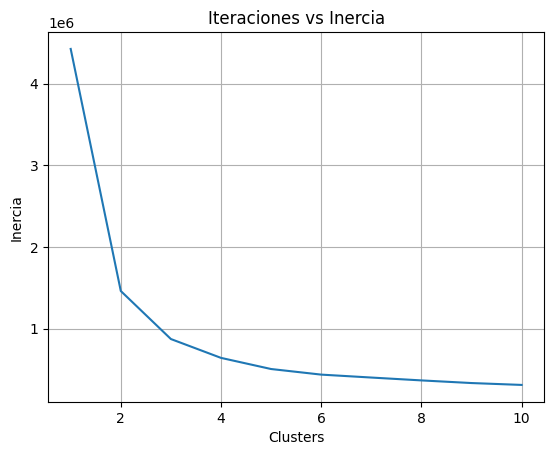

In [39]:
# Podemos notar que aparter de 3 clusters la diferencia en la inercia no es tan evidente por lo que usaremos 3 clusters para nuestro algoritmo final
plt.plot(range(1,11),inercias)
plt.xlabel('Clusters')
plt.ylabel('Inercia')
plt.title('Iteraciones vs Inercia')
plt.grid()
plt.show()

In [40]:
# Aplicamos el algoritmo finalmente
Kmeans=KMeans(n_clusters=3 ,max_iter=300)
Kmeans.fit(icfesnp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [41]:
# Estas serían las predicciones que se hicieron

resultados = Kmeans.fit_predict(icfesnp)
print(resultados)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 0 0 0 2 0 0 0 0 2 2 0 0 1 1 0 1 1 1 0 1 1 2 0 0 1 1 2 0 1 1 0 1 1 1 2
 0 0 2 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 2 0 1 1 0 0 0 0 0 0 2 0 2 0 2 0 0 2 1
 1 0 0 0 0 0 2 0 2 1 1 1 1 1 0 1 2 1 2 2 0 1 0 2 0 1 2 2 1 2 1 1 2 2 0 1 1
 0 1 2 2 1 2 1 1 2 1 0 0 2 2 0 2 0 1 0 1 0 2 1 2 1 1 0 2 1 2 2 1 1 1 2 2 2
 2 0 0 2 1 1 0 1 1 1 1 1 1 1 2 1 2 0 2 1 0 2 2 2 2 2 1 2 1 2 2 0 0 0 1 2 0
 0 2 1 0 1 1 1 2 2 2 2 2 0 1 2 0 1 1 1 2 0 2 1 2 0 2 0 2 0 1 1 2 2 0 1 1 0
 2 2 0 1 0 0 0 1 2 0 0 1 2 0 1 0 1 1 2 2 1 2 2 1 2 1 0 0 0 2 1 1 0 1 1 1 2
 1 1 0 0 0 2 0 1 0 1 1 0 0 0 0 1 0 2 1 2 1 2 1 0 1 1 0 2 1 0 1 0 2 0 2 0 0
 1 2 0 0 1 1 0 0 1 0 2 2 0 1 2 2 2 0 2 0 2 0 0 0 1 0 1 2 0 0 2 0 1 1 0 1 1
 1 2 0 1 0 1 1 2 1 0 0 0 1 1 1 0 0 0 0 0 1 0 2 1 0 1 1 2 0 0 1 1 1 0 0 2 2
 2 1 0 1 1 0 1 0 1 0 2 0 1 1 0 0 2 1 2 0 1 0 1 2 1 1 0 0 2 1 0 0 1 1 0 0 2
 1 0 2 0 0 1 1 1 2 2 0 2 1 1 1 0 2 2 0 2 2 1 2 0 0 2 2 1 2 0 2 1 1 2 2 2 0
 0 2 1 1 0 1 1 2 1 1 2 1 0 2 1 1 1 1 1 1 1 0 0 0 2 0 2 0 0 1 2 0 0 0 1 1 0
 1 2 1 2 1 1 2 0 1 1 2 2 

A lo que estaba procurando llegar era a que se separara en grupos dependiendo el puntaje que se haya obtenido en el icfes (bueno, regular o malo)

Asi que ahora haré una prueba con los tres posibles resultado que se esperarían para asi saber cuál corresponde a cada uno

In [70]:
# Aqui podemos observar que para los regultados "malos" se ha asignado el grupo 2, para los "buenos" el 1, y para los "regulares" el 0
prueba = [[ 30,  26,  32,  29,  28, 183],[ 50,  64,  65,  65,  60, 400],[ 78,  65,  59,  48,  51, 288]]
pruebanp = np.array(prueba)
pruresul = Kmeans.fit_predict(pruebanp)
pruresul

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 0], dtype=int32)

     ***ASI QUEDAN LOS GRUPOS***

**BUENO**= 1

**REGULAR**= 0

**MALO**= 2

In [42]:
#Anilizar los resultados de la agrupación
print(type(resultados))
print(len(resultados))
arr_= resultados
print(type(icfesnp))
print(len(icfesnp))

<class 'numpy.ndarray'>
1000
<class 'numpy.ndarray'>
1000


In [58]:
# como tenemos tanta cantidad de datos estos en el momento de graficar casi no se pueden visualizar por lo que tomaremos una muestra del 10% de los datos totales de resultados

dfresult = pd.DataFrame(resultados)
muestra = dfresult.head(100)
muestra

,0
0,2
1,0
2,0
3,0
4,0
...,...
95,1
96,0
97,2
98,0


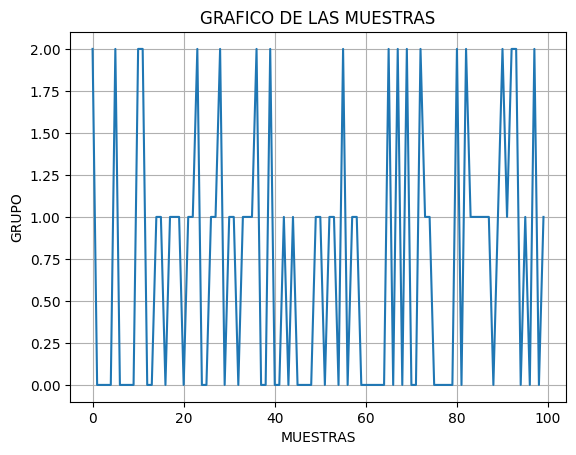

In [75]:
# Hacemos un grafico de lineas para representar los datos

plt.plot(muestra, scalex=True)
plt.grid()
plt.title('GRAFICO DE LAS MUESTRAS')
plt.ylabel('GRUPO')
plt.xlabel('MUESTRAS')
plt.show()

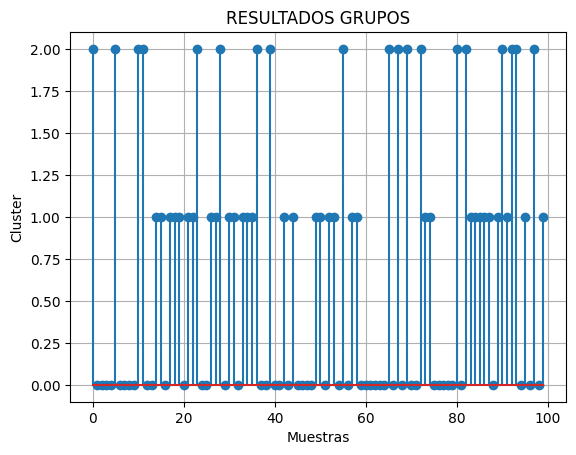

In [46]:
plt.stem(muestra)
plt.grid()
plt.title('RESULTADOS GRUPOS')
plt.xlabel('Muestras')
plt.ylabel('Cluster')
plt.show()

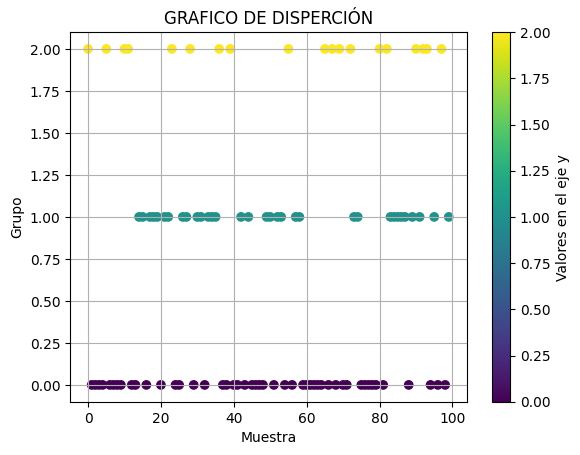

In [65]:
# tambien podemos hacer un grafico de disperción usando diferentes colores para cada grupo para resaltar que son diferentes, a diferencia de que si los hubiesemos dejado del mismo color todos
rango= range(0, len(muestra))
plt.scatter(rango, muestra, c=muestra, cmap='viridis', label='Datos')
cbar = plt.colorbar()
plt.title('GRAFICO DE DISPERCIÓN')
plt.ylabel('Grupo')
plt.xlabel('Muestra')
plt.grid()
cbar.set_label('Valores en el eje y')
plt.show()

In [76]:
# Hacemos un describe para comprobar algunos analisis
muestra.describe()

,0
count,100.000000
mean,0.710000
std,0.769297
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


Con los graficos que tenemos podemos analizar que en donde menos datos hubieron fueron en el 2 que representaba un resultado malo y que donde más datos podemos ver es en el 0 que representa resultados "Regulares" o acepatables, por lo que podriamos decir que en promedio tenemos resultados "regulares" y que los resultados "malos" son los más raros

Finalemente podriamos decir que logramos los que buscabamos, sin embargo podria mejorar en cuestión de representación y de inercia, concluimos que la agrupación fue regular acercandose más a ser buena que mala

***La clasificación es buena***

***FIN DE LA ACTIVIDAD***


Agradezco inmensamente todo lo que aprendí en el curso y ademas el que se haya tomado el tiempo de revisar mi trabajo recibiré todas las recomendaciones y espero poder aprender más en un futuro.

Cordial saludo

Gracias.


FIN.